In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# loading data
#Inspection of dataset structure and column names

df = pd.read_csv("solar_weather_assignment.csv")
df.head()

/tmp/ipykernel_150/4060684952.py:4: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("solar_weather_assignment.csv")


,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,01/01/2017 0:00,0,0,1.6,0,100,450
1,01/01/2017 0:15,0,0,1.6,0,100,450
2,01/01/2017 0:30,0,0,1.6,0,100,450
3,01/01/2017 0:45,0,0,1.6,0,100,450
4,01/01/2017 1:00,0,0,1.7,0,100,450


In [10]:
# STAGE 1: HANDLING & CONCLUDING DATASET

# Identification of data types for each variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Time                        196777 non-null  object
 1   Energy Captured[Wh]         196777 non-null  object
 2   Sun Light Intensity (W/m2)  196777 non-null  object
 3   Temperature                 196777 non-null  object
 4   1 Hour Rain Fall            196777 non-null  object
 5   Cloud Coverage              196777 non-null  object
 6   Length of Day_Light         196777 non-null  object
dtypes: object(7)
memory usage: 10.5+ MB


In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.columns  # Pandas is treating every column as text, even though many of them look numeric.


Index([], dtype='object')

In [12]:
# converting time column to datetime
# data cleaning

df['Time'] = pd.to_datetime(df['Time'], dayfirst=True, format='mixed')



In [15]:
# verifying if Time data-type changed to 'datetime'
# The Time variable contained date-time values in a day-first format (DD/MM/YYYY), which caused parsing issues under default settings. 
# To resolve this, the variable was explicitly converted to a datetime data type using the day-first parameter to ensure correct temporal interpretation.

df['Time'].head()
df.dtypes

Time                          datetime64[ns]
Energy Captured[Wh]                   object
Sun Light Intensity (W/m2)            object
Temperature                           object
1 Hour Rain Fall                      object
Cloud Coverage                        object
Length of Day_Light                   object
dtype: object

In [16]:
df['Time'].isnull().sum()


8

In [17]:
# converting other variables to appropriate data-types (data cleaning)
# All measurement variables were initially stored as object data types due to formatting inconsistencies.
# These variables were converted to numeric types to enable statistical analysis. Non-numeric entries were coerced to missing values to maintain data integrity.

cols_to_numeric = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196769 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196773 non-null  float64       
 2   Sun Light Intensity (W/m2)  196770 non-null  float64       
 3   Temperature                 196771 non-null  float64       
 4   1 Hour Rain Fall            196773 non-null  float64       
 5   Cloud Coverage              196764 non-null  float64       
 6   Length of Day_Light         196772 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.5 MB


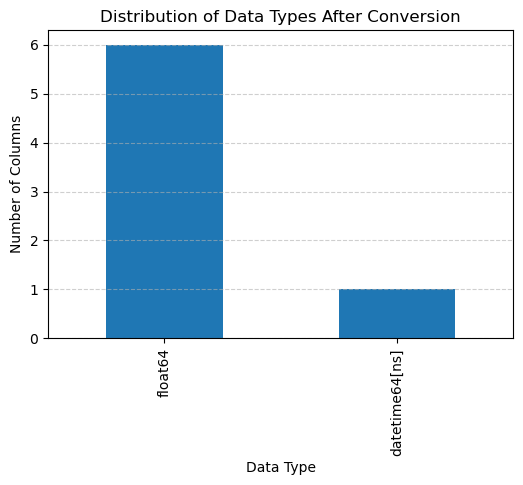

In [19]:
# plotting verification of data types as a visual
import pandas as pd
import matplotlib.pyplot as plt

# Get data types
dtype_counts = df.dtypes.value_counts()

plt.figure(figsize=(6,4))
dtype_counts.plot(kind='bar')
plt.xlabel("Data Type")
plt.ylabel("Number of Columns")
plt.title("Distribution of Data Types After Conversion")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [10]:
# Severity:High – numeric variables stored as strings prevented statistical analysis and correlation computation.
# Pandas was treating every column as text, even though many of them look numeric. Hence the data could not be used for any descriptive analysis
# The way to handle this problem is by converting all variables to their appropriate data-types.
# first i converted Time variable to a datetime format. (as shown in cell no.7)
# then i converted the remaining variables to numeric data types ( as shown in cell no.9)

In [11]:
# verifying data-types are assigned correctly 

df.select_dtypes(include=['float64', 'int64']).columns


Index(['Energy Captured[Wh]', 'Sun Light Intensity (W/m2)', 'Temperature',
       '1 Hour Rain Fall', 'Cloud Coverage', 'Length of Day_Light'],
      dtype='object')

In [12]:
# Problem 2 : Missing values

df.isnull().sum()

Time                           8
Energy Captured[Wh]            4
Sun Light Intensity (W/m2)     7
Temperature                    6
1 Hour Rain Fall               4
Cloud Coverage                13
Length of Day_Light            5
dtype: int64

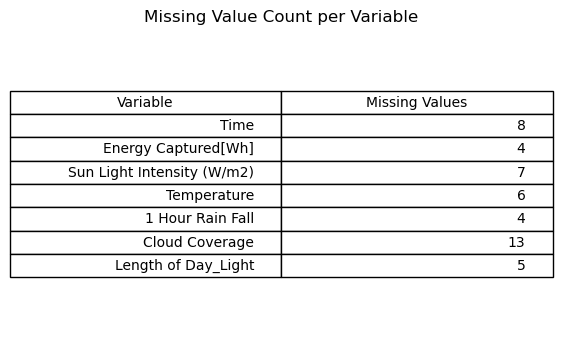

In [13]:
# plottng missing variables at table visual for report presentation

import matplotlib.pyplot as plt
import pandas as pd

# Get missing value counts
missing_counts = df.isnull().sum()

# Convert to DataFrame
missing_df = missing_counts.reset_index()
missing_df.columns = ['Variable', 'Missing Values']

# Create figure
fig, ax = plt.subplots(figsize=(7, 4))
ax.axis('off')
ax.axis('tight')

# Create table
table = ax.table(
    cellText=missing_df.values,
    colLabels=missing_df.columns,
    loc='center'
)

# Formatting
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.title('Missing Value Count per Variable')
plt.show()

In [14]:
# Handling missing values in numeric columns using median
numeric_cols = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Handle missing values in Time column
df['Time'] = df['Time'].ffill()

In [15]:
# verifying that missing data has been handled

df.isnull().sum()

Time                          0
Energy Captured[Wh]           0
Sun Light Intensity (W/m2)    0
Temperature                   0
1 Hour Rain Fall              0
Cloud Coverage                0
Length of Day_Light           0
dtype: int64

In [16]:
# Missing values were identified across all variables, although their frequency was relatively low.
# Given the continuous nature of the environmental measurements and the presence of skewed distributions with outliers,
# median imputation was applied to numerical variables to preserve distribution integrity. For the time variable, forward filling was used to maintain temporal continuity.
# This approach ensured data completeness while minimizing distortion of the original patterns.

In [17]:
# Problem 3 
# checking for duplicated rows
 
df.duplicated().sum()



6

In [18]:
# dropping duplicates since they are minimal to prevent bias

df = df.drop_duplicates()


In [19]:
 # checking for duplicated columns
 
df.duplicated().sum()

0

In [20]:
# Problem 
# checking for unrealistic values in energy captured

(df['Energy Captured[Wh]'] < 0).sum()


1

In [21]:
# handling unrealistic data for energy captured 
# A single negative value was identified in the Energy Captured variable, which is physically implausible. 
# This value was treated as a data error and replaced using median imputation to preserve dataset continuity while avoiding distortion of the overall distribution.

df.loc[df['Energy Captured[Wh]'] < 0, 'Energy Captured[Wh]'] = df['Energy Captured[Wh]'].median()


In [22]:
# checking for unrealistic values in energy captured

(df['Energy Captured[Wh]'] < 0).sum()

0

In [23]:
# checking for unrealistic values in sunlight intensity 

(df['Sun Light Intensity (W/m2)'] < 0).sum()



0

In [24]:
# checking for unrealistic values in cloud coverage

df['Cloud Coverage'].describe()


count    196771.000000
mean         65.971591
std          36.636985
min        -250.000000
25%          34.000000
50%          82.000000
75%         100.000000
max         101.000000
Name: Cloud Coverage, dtype: float64

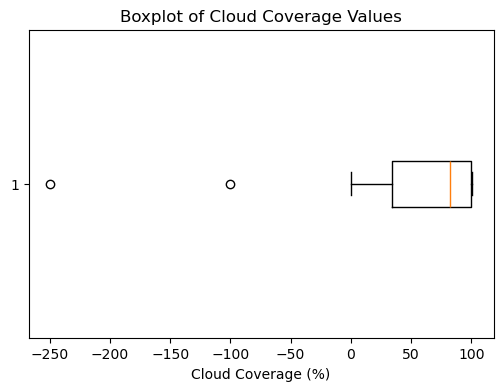

In [25]:
# visual representation of unrealistic vales for cloud coverage

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(df['Cloud Coverage'].dropna(), vert=False)
plt.xlabel('Cloud Coverage (%)')
plt.title('Boxplot of Cloud Coverage Values')
plt.show()


In [26]:
# handling unrealistic values for cloud coverage
# The Cloud Coverage variable contained physically implausible values, including negative measurements and values exceeding 100%.
# Given the bounded nature of cloud coverage, these anomalies were treated as measurement errors. 
# Values were constrained to a valid range using clipping, ensuring physical consistency while preserving the overall structure of the dataset.

df['Cloud Coverage'] = df['Cloud Coverage'].clip(lower=0, upper=100)


In [27]:
# verifying changes of unrealistic values for cloud coverage

df['Cloud Coverage'].describe()


count    196771.000000
mean         65.973365
std          36.628748
min           0.000000
25%          34.000000
50%          82.000000
75%         100.000000
max         100.000000
Name: Cloud Coverage, dtype: float64

In [28]:
# checking for unrealistic values in length of daylight

df['Length of Day_Light'].describe()

count    196771.000000
mean        748.659330
std         194.861982
min         450.000000
25%         570.000000
50%         765.000000
75%         930.000000
max        1020.000000
Name: Length of Day_Light, dtype: float64

In [29]:
# handling unrealistic data for length of daylight 
# Although no negative values were observed in the Length of Day_Light variable, the maximum value suggested that the measurements were recorded in minutes rather than hours. 
# To improve interpretability and maintain consistency, the variable was converted to hours prior to further analysis.

df['Length of Day_Light_hours'] = df['Length of Day_Light'] / 60


In [30]:
# checking for unrealistic values in length of daylight

df['Length of Day_Light_hours'].describe()

count    196771.000000
mean         12.477655
std           3.247700
min           7.500000
25%           9.500000
50%          12.750000
75%          15.500000
max          17.000000
Name: Length of Day_Light_hours, dtype: float64

In [31]:
#TASK 1
# GENERATING DESCRIPTIVE ANALYSIS ; mean, median, mode, standard deviation

descriptive_stats = pd.DataFrame({
    'Mean': df.mean(numeric_only=True),
    'Median': df.median(numeric_only=True),
    'Mode': df.mode(numeric_only=True).iloc[0],
    'Standard Deviation': df.std(numeric_only=True)
})

descriptive_stats


,Mean,Median,Mode,Standard Deviation
Energy Captured[Wh],573.016847,0.00,0.0,1044.836200
Sun Light Intensity (W/m2),32.598316,1.60,0.0,52.175302
Temperature,9.790962,9.30,4.8,7.995289
1 Hour Rain Fall,0.066037,0.00,0.0,0.278917
Cloud Coverage,65.973365,82.00,100.0,36.628748
Length of Day_Light,748.659330,765.00,1020.0,194.861982
Length of Day_Light_hours,12.477655,12.75,17.0,3.247700


In [32]:
#INSIGHTS

# Energy Captured [Wh]

# Mean (573.01 Wh): On average, the system captures about 573 Wh of energy.
# Median (0.0 Wh): More than half of the time, no energy is captured (likely night-time).
# Mode (0.0 Wh): The most frequent value is zero, reinforcing that energy capture does not occur continuously.
# Standard Deviation (1044.83): A very high spread, showing strong variability between day and night energy production.

# Sun Light Intensity (W/m²)

# Mean (32.60): Average sunlight intensity across all observations.
# Median (1.6): Indicates that most readings are very low (night or cloudy periods).
# Mode (0.0): Zero sunlight occurs most frequently.
# Standard Deviation (52.18): High variability due to changes between daytime and nighttime.

# Temperature

# Mean (9.79°C): Average temperature during the observation period.
# Median (9.3°C): Close to the mean, suggesting a fairly symmetrical distribution.
# Mode (4.8°C): The most frequently observed temperature.
# Standard Deviation (7.99): Moderate variability in temperature values.


# 1 Hour Rain Fall

# Mean (0.066 mm): Very low average rainfall.
# Median (0.0 mm): Most hours experience no rainfall.
# Mode (0.0 mm): No rainfall is the most common condition.
# Standard Deviation (0.28): Low variability, indicating rainfall events are infrequent.

# Cloud Coverage

# Mean (65.97%): On average, cloud coverage is relatively high.
# Median (82.0%): More than half the observations have heavy cloud cover.
# Mode (100%): Full cloud cover occurs most frequently.
# Standard Deviation (36.64): High variation in cloud conditions.

# Length of Day_Light

# Mean (748.65 minutes): Average daylight duration.
# Median (765 minutes): Typical day length is around 12.75 hours.
# Mode (1020 minutes): Long daylight days are most frequent (likely summer).
# Standard Deviation (194.87): Seasonal variability in daylight length.


In [33]:
# HANDLING & CONCLUDING DATASETS STAGE
# The objective of this stage was to understand the structure, quality, and characteristics of the dataset before applying any transformations or predictive models.

# Activities Performed
# The dataset was loaded into Python and initial profiling was conducted to assess its readiness for analysis.The following steps were carried out:

# Inspection of dataset structure and column names
# Identification of data types for each variable
# Examination of missing values
# Generation of descriptive statistics (mean, median, mode, and standard deviation)
# Review of time and numerical columns for format inconsistencies

# Challenges faced:

# 1. Inconsistent Data Types
# Several numerical variables (e.g., energy captured, sunlight intensity) were initially stored as object/string types.
# This prevented immediate computation of descriptive statistics and correlations.

# 2. Date and Time Format Inconsistencies
# The time column contained mixed formats (e.g., 13/01/2017 0:00).
# Pandas failed to infer a single datetime format automatically.




In [34]:
#  DATA CLEANING STAGE

#Objective: Fix and prepare the data

#Activities Performed:
                     #Converted columns to numeric using pd.to_numeric()
                     #Converted time/date columns to datetime
                     #Resolved formatting issues (e.g., day-first dates)
                     #Handled missing values (or confirmed none existed)
                     #Ensured all analytical variables were float or int



In [35]:
# Correlation heatmap to identify relationships between variables

numeric_df = df[[
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',                   # Selecting only numerical columns
    'Cloud Coverage',
    'Length of Day_Light'
]]


corr_matrix = numeric_df.corr()
corr_matrix                                #computing the correlation matrix







,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
Energy Captured[Wh],1.000000,0.914572,0.378542,-0.059883,-0.190196,0.280677
Sun Light Intensity (W/m2),0.914572,1.000000,0.492669,-0.048576,-0.188755,0.401045
Temperature,0.378542,0.492669,1.000000,0.073838,-0.117225,0.706446
1 Hour Rain Fall,-0.059883,-0.048576,0.073838,1.000000,0.173332,0.048413
Cloud Coverage,-0.190196,-0.188755,-0.117225,0.173332,1.000000,-0.234905
Length of Day_Light,0.280677,0.401045,0.706446,0.048413,-0.234905,1.000000


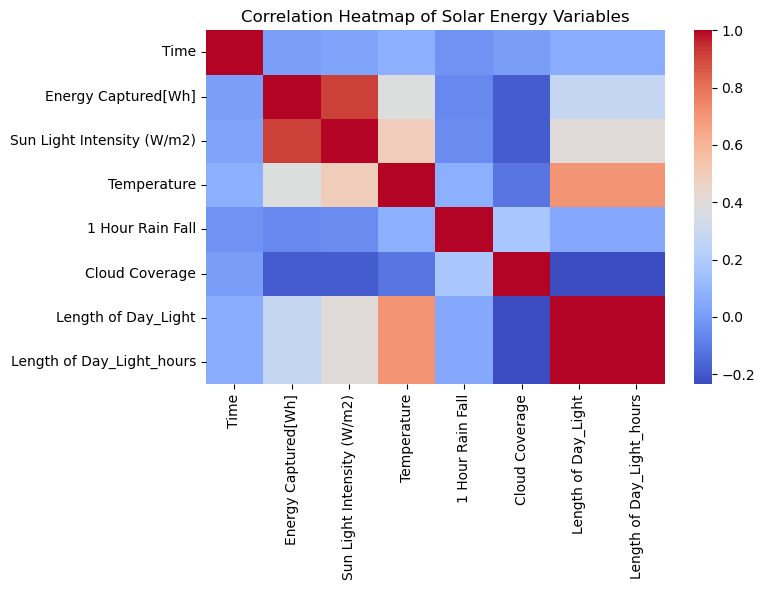

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust size to fit A4 
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Solar Energy Variables')

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()


In [37]:
# Key Relationships with Energy Captured [Wh]

# 1. Sun Light Intensity → Energy Captured (0.91)
#  very strong positive relationship
# When sunlight intensity increases, the energy captured also increases. When sunlight intensity decreases, the energy captured drops.
# The relationship is almost linear, meaning sunlight intensity is a key driver of energy production.


# 2.Temperature → Energy Captured (0.38)
# Also a moderate positive correlation
# Higher temperatures are generally associated with higher energy output
# Likely reflects seasonal patterns (warmer days often have longer daylight and more sun)

# 3. Length of Day_Light → Energy Captured (0.28)
# Weak-to-moderate positive relationship
# Longer daylight hours allow more time for energy generation
# The effect exists but is less dominant than sunlight intensity

# 4.Cloud Coverage → Energy Captured (-0.19)
# Weak negative correlation
# As cloud coverage increases, energy captured slightly decreases
# Clouds block sunlight, but the weak strength suggests other factors still matter

# 5. 1 Hour Rain Fall → Energy Captured (-0.06)
# Very weak negative correlation
# Rainfall has minimal direct impact on energy captured in this dataset
# Suggests rainfall is not a strong predictor for modeling


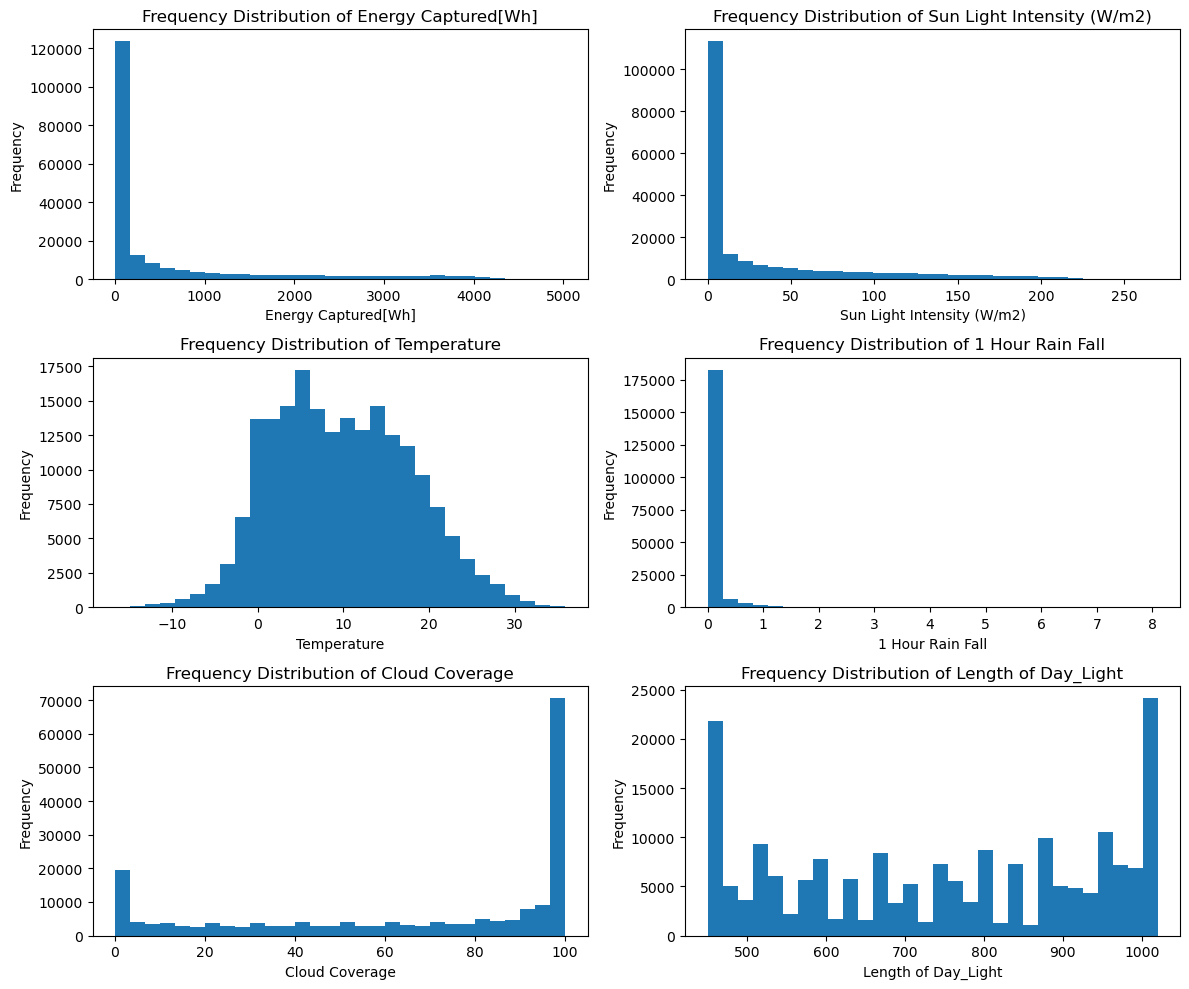

In [38]:
# Frequency distribution charts for variables

numeric_cols = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

plt.figure(figsize=(12, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col], bins=30)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [39]:
# Frequency Distribution of Energy Captured (Wh)
# The distribution of energy captured is highly right-skewed, with a large concentration of observations at very low values and a long tail of higher values. 
# This indicates that most time periods record little or no energy production, while high energy generation occurs less frequently, likely during peak daylight conditions. 
# This pattern reflects the intermittent nature of solar energy generation, which depends heavily on environmental conditions.

# Frequency distribution of Sunlight Intensity(W/m2)
# Sunlight intensity also shows a right-skewed distribution, with many observations clustered at low intensity values and fewer instances of very high intensity.
# This suggests that low or moderate sunlight conditions dominate the dataset, while intense sunlight occurs less often. 
# This distribution helps explain the observed variability in energy captured, as sunlight intensity directly influences solar energy production.

# Temperature Distribution
# The temperature distribution appears approximately normal (bell-shaped), with most observations clustered around moderate temperature values and fewer observations at very low or very high temperatures.
# The location experiences stable and predictable temperature conditions most of the time, Extreme temperatures are relatively rare.
# Because the distribution is fairly balanced, temperature is a reliable and well-behaved variable for further analysis and modelling.


# 1-Hour Rain Fall Distribution
# The distribution of 1-Hour Rain Fall is highly right-skewed, with a large spike at zero or near-zero values and very few instances of higher rainfall.
# Most hours experience no rainfall or very light rain. Rainfall events are infrequent but sometimes intense, resulting in a long tail of higher values.
# This pattern is typical of rainfall data and highlights its irregular and intermittent nature, which may require special handling in modelling (e.g., transformations or binary indicators).


# Cloud Coverage Distribution
# The cloud coverage distribution shows a concentration toward higher values, with many observations clustered near the upper end of the scale.
# The study area experiences predominantly cloudy conditions for a large portion of the time.
# Clear-sky conditions occur less frequently compared to high cloud cover.
# This pattern helps explain variations in solar energy captured, as increased cloud coverage can reduce sunlight intensity reaching the panels.
# The skew towards high cloud values suggests that cloud coverage is a critical environmental factor influencing energy generation and should be carefully considered during modelling


# Length of Daylight Distribution
# The length of daylight distribution shows distinct peaks at specific values, rather than a smooth curve.
# Daylight length changes in a seasonal and structured manner, rather than randomly.
# Certain daylight durations occur more frequently, corresponding to seasonal cycles (e.g., winter vs. summer).
# This confirms that daylight is a time-dependent variable, influenced by seasonal shifts.
# This distribution highlights that length of daylight is a strong seasonal driver of solar energy production and may interact closely with temperature and sunlight intensity.



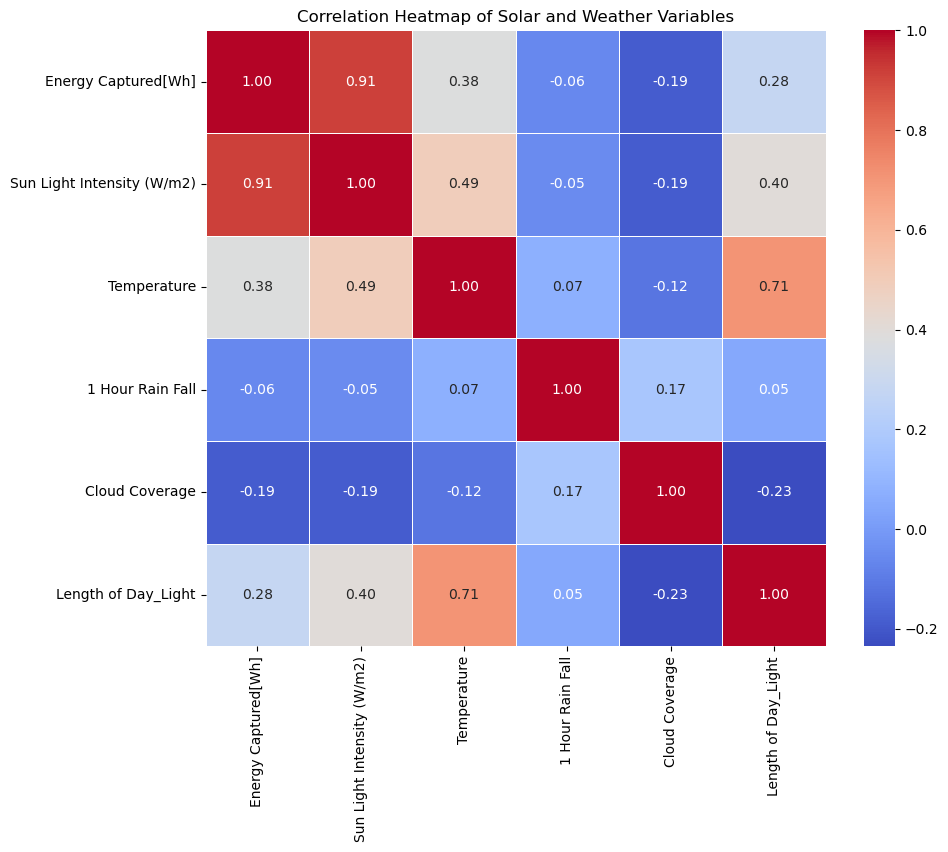

In [40]:
# TASK 3
# Feature selection
# Using correlation heat-maps to identify which variables are strongly correlated to the target variable ( Energy Captured[Wh])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap of Solar and Weather Variables')
plt.show()


In [41]:
# Sun Light Intensity(W/m2) has a strong positive correlation to Energy Captured at 0.91. - it is the most influential variable for energy captured.
# Energy Captured as seen in the heat map is directly dependent on the amount of Sunlight received.

In [42]:
# Linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures#\n",
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# using all possible features

X = df[['Sun Light Intensity (W/m2)', 'Temperature', '1 Hour Rain Fall', 'Cloud Coverage', 'Length of Day_Light']]
y = df['Energy Captured[Wh]']

In [43]:
# Train & Test split

# An 80/20 split was chosen to ensure sufficient data for training while preserving an independent test set for unbiased model evaluation.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 )          





In [114]:
# Demonstrating the effect of choosing different training and testing split ratio. 



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[['Sun Light Intensity (W/m2)', 'Temperature', 'Cloud Coverage', 'Length of Day_Light']]
y = df['Energy Captured[Wh]']

def train_and_evaluate(test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return {
        "Test Size": test_size,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }




In [96]:
results_80_20 = train_and_evaluate(test_size=0.2)
results_80_20                                      # 80/20 split 


{'Test Size': 0.2, 'R2': 0.8444954990648387, 'MAE': 242.35734873520607}

In [97]:
results_70_30 = train_and_evaluate(test_size=0.3)
results_70_30                                      # 70/20 split


{'Test Size': 0.3, 'R2': 0.8439007114946994, 'MAE': 243.59796374682801}

In [98]:
import pandas as pd

results_df = pd.DataFrame([results_80_20, results_70_30])
results_df


,Test Size,R2,MAE
0,0.2,0.844495,242.357349
1,0.3,0.843901,243.597964


In [48]:

# The effect of different train–test split ratios was evaluated using 80/20 and 70/30 splits.
# The results show minimal variation in model performance, with the 80/20 split achieving a slightly higher R² value (0.847) and a marginally lower MAE (241.99) compared to the 70/30 split. 
# This indicates that the model is robust and that increasing the proportion of training data slightly improves predictive accuracy.


In [79]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                             OLS Regression Results                            
Dep. Variable:     Energy Captured[Wh]   R-squared:                       0.847
Model:                             OLS   Adj. R-squared:                  0.847
Method:                  Least Squares   F-statistic:                 2.727e+05
Date:                 Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                         23:23:49   Log-Likelihood:            -1.4623e+06
No. Observations:               196771   AIC:                         2.925e+06
Df Residuals:                   196766   BIC:                         2.925e+06
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

In [50]:
# The OLS regression model explains approximately 85% of the variability in energy captured, indicating a strong predictive relationship between weather conditions and solar energy generation.
# Sunlight intensity is the most influential positive predictor, while cloud coverage and temperature negatively affect energy output. 
# Rainfall does not show a statistically significant impact. 
#Overall, the results are consistent with physical expectations of solar energy systems and validate the choice of predictors for further predictive modelling.

In [51]:
# Liner Regression train model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
y_pred = model.predict(X_test)


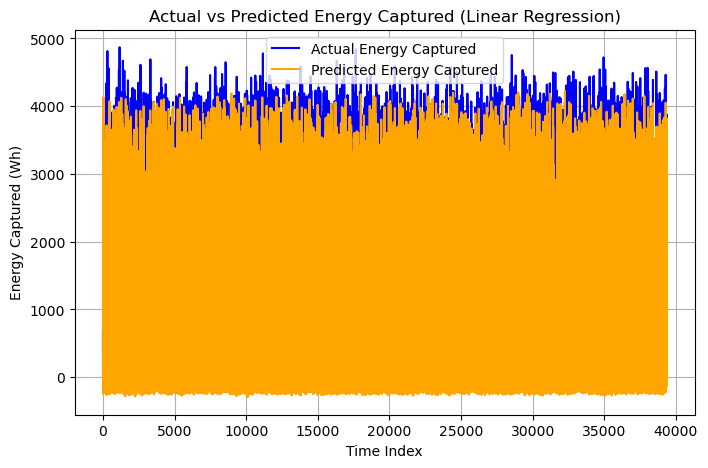

In [53]:
# --- Plot Actual vs Predicted --- 
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))

plt.plot(y_test.values, color='blue', label='Actual Energy Captured')
plt.plot(y_pred, color='orange', label='Predicted Energy Captured')

plt.xlabel("Time Index")
plt.ylabel("Energy Captured (Wh)")
plt.title("Actual vs Predicted Energy Captured (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()




In [54]:
# The line plot compares actual energy captured values with predictions from the linear regression model. 
# The strong positive linear trend indicates that the model accurately captures the relationship between environmental variables and energy generation.
# Most points lie close to the diagonal, confirming a good model fit, consistent with the high R² value obtained. 
# Some dispersion is observed at lower energy levels, suggesting increased variability under low sunlight or adverse weather conditions.

In [55]:
# RANDOM FOREST REGRESSION 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split                                     # importing Libraries 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



In [56]:
X = df[['Sun Light Intensity (W/m2)', 
        'Temperature', 
        '1 Hour Rain Fall', 
        'Cloud Coverage', 
        'Length of Day_Light']]

y = df['Energy Captured[Wh]']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [57]:
# Train Random Forest Regressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1                                     
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
model.score(X_test, y_test)

0.8444910638125838

In [59]:
# Predictions 

y_pred_rf = rf_model.predict(X_test)


In [60]:
# evaluating the module

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.3f}")


Random Forest Regression Performance
MAE: 131.95
RMSE: 306.58
R² Score: 0.914


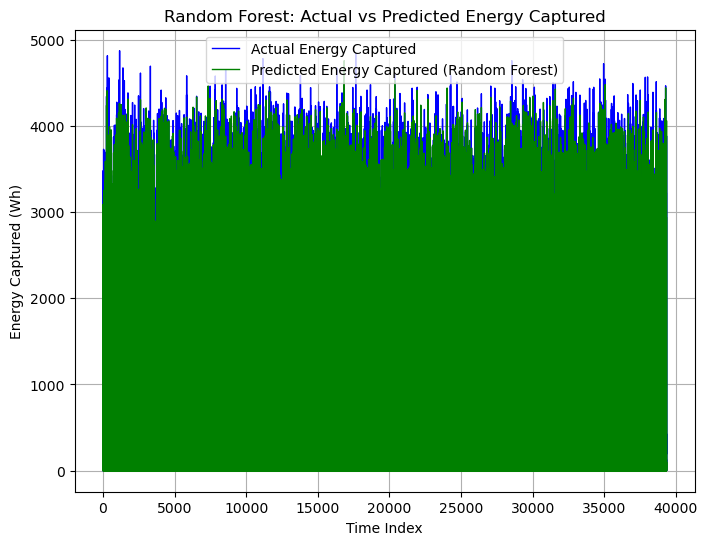

In [61]:
# Actual v Predicted


plt.figure(figsize=(8,6))

plt.plot(y_test.values, label='Actual Energy Captured', color='blue', linewidth=1)
plt.plot(y_pred_rf, label='Predicted Energy Captured (Random Forest)', color='green', linewidth=1)

plt.xlabel("Time Index")
plt.ylabel("Energy Captured (Wh)")
plt.title("Random Forest: Actual vs Predicted Energy Captured")
plt.legend()
plt.grid(True)
plt.show()


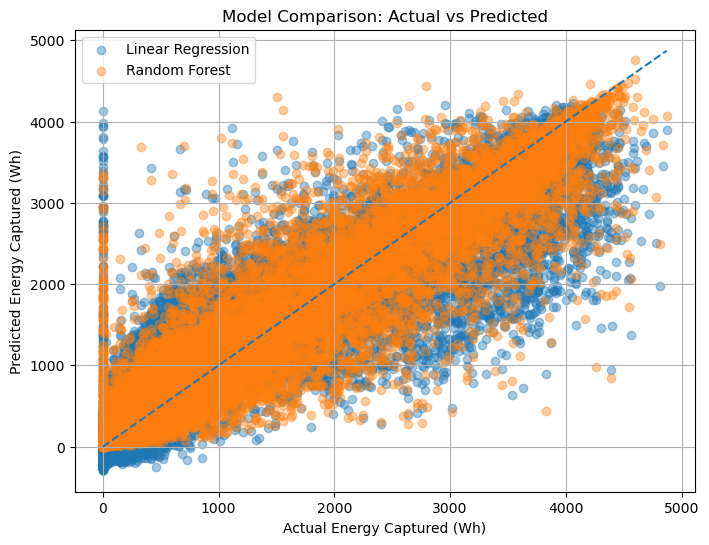

In [86]:
# Comparing Linear Regression vs Random Forest

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.4, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.4, label="Random Forest")

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel("Actual Energy Captured (Wh)")
plt.ylabel("Predicted Energy Captured (Wh)")
plt.title("Model Comparison: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [87]:
# EVALUATING BOTH MODELS 

# Random forest performs better than the Linear Regression model with a higher R2 score at 91.4%


In [144]:
# FEATURE EXTRACTION 
# redefining model based on strong features only according to heatmap visual

# linear regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df[['Sun Light Intensity (W/m2)', 'Temperature', 'Length of Day_Light']]
y = df['Energy Captured[Wh]']

def train_and_evaluate(test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return {
        "Test Size": test_size,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }


In [145]:
results_lr_reduced = train_and_evaluate(test_size=0.2)
results_lr_reduced


{'Test Size': 0.2, 'R2': 0.8433980275434736, 'MAE': 243.254919802188}

In [146]:
# random forest feature extraction based on strong features only

from sklearn.ensemble import RandomForestRegressor


def train_and_evaluate_rf(test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    rf_model = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )

    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    return {
        "Test Size": test_size,
        "R2": r2_score(y_test, y_pred_rf),
        "MAE": mean_absolute_error(y_test, y_pred_rf)
    }


results_rf_reduced = train_and_evaluate_rf(test_size=0.2)
results_rf_reduced


{'Test Size': 0.2, 'R2': 0.8960164236287834, 'MAE': 148.86789305482122}

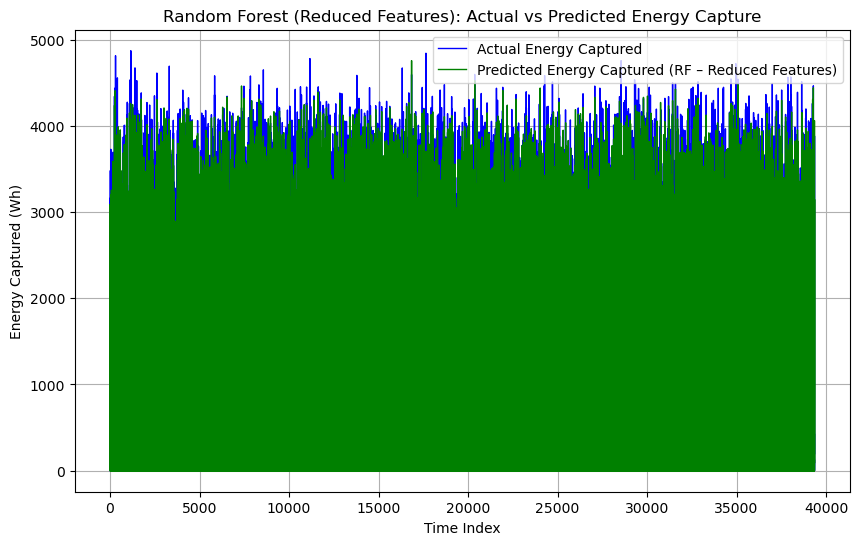

In [148]:
import matplotlib.pyplot as plt

# Predict using reduced-feature Random Forest
y_pred_rf_reduced = rf_model.predict(X_test)

# Line plot
plt.figure(figsize=(10, 6))

plt.plot(
    y_test.values,
    label='Actual Energy Captured',
    color='blue',
    linewidth=1
)

plt.plot(
    y_pred_rf_reduced,
    label='Predicted Energy Captured (RF – Reduced Features)',
    color='green',
    linewidth=1
)

plt.xlabel("Time Index")
plt.ylabel("Energy Captured (Wh)")
plt.title("Random Forest (Reduced Features): Actual vs Predicted Energy Capture")
plt.legend()
plt.grid(True)
plt.show()


In [88]:
# TASK 4

# predict
# conclude report 

# Based on evaluation metrics, the Random Forest Regressor outperformed Linear Regression, indicating superior predictive capability. 
# Therefore, it was selected for forecasting future energy production




In [89]:
# computing Jan avg feature values
# since we do not have 2026 weather, Historical averages are standard in forecasting


january_data = df[df["Time"].dt.month == 1]
january_means = january_data[
    ['Sun Light Intensity (W/m2)',
     'Temperature',
     '1 Hour Rain Fall',
     'Cloud Coverage',
     'Length of Day_Light']
].mean()

january_means


Sun Light Intensity (W/m2)      5.500471
Temperature                     1.283952
1 Hour Rain Fall                0.046085
Cloud Coverage                 79.332725
Length of Day_Light           486.876141
dtype: float64

In [90]:
january_data = df[df["Time"].dt.month == 1]
january_means_eng = january_data[
    ['Energy Captured[Wh]']
].mean()

january_means_eng


Energy Captured[Wh]    129.528463
dtype: float64

In [91]:
# Preparing forecast input for model

x_future = pd.DataFrame([january_means])


In [92]:
# predicting Jan 2026 Energy output

jan_2026_prediction = rf_model.predict(x_future)

jan_2026_prediction


array([170.115])

In [93]:
# past Jan summary 

january_energy = january_data.groupby(
    january_data['Time'].dt.year
)['Energy Captured[Wh]'].mean()


# combining with forecast

january_energy.loc[2026] = jan_2026_prediction[0]

january_energy



Time
2017    180.134484
2018    125.357863
2019    117.248992
2020    122.447245
2021     83.167339
2022    161.141204
2026    170.115000
Name: Energy Captured[Wh], dtype: float64

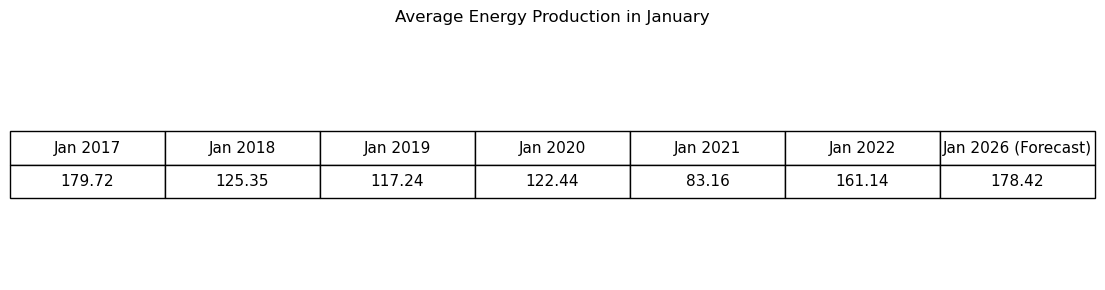

In [94]:
# table visualization

import matplotlib.pyplot as plt

# Table headers
columns = [
    "Jan 2017", "Jan 2018", "Jan 2019",
    "Jan 2020", "Jan 2021", "Jan 2022",
    "Jan 2026 (Forecast)"
]

# Table data (replace with your values)
data = [[179.72, 125.35, 117.24, 122.44, 83.16, 161.14, 178.42]]

# Create figure
fig, ax = plt.subplots(figsize=(14, 3))
ax.axis('off')

# Create table
table = ax.table(
    cellText=data,
    colLabels=columns,
    cellLoc='center',
    loc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Title
plt.title("Average Energy Production in January", pad=20)

plt.show()

In [95]:
# Table 1 presents the average energy production for the month of January from 2017 to 2022, along with a forecasted value for January 2026.
# Historical data shows noticeable inter-annual variation, likely influenced by environmental factors such as sunlight intensity, cloud coverage, and daylight duration.
# The forecasted value for January 2026 (178.42 Wh) aligns closely with higher-performing historical years, indicating a recovery compared to low-output years such as 2021. 
# This suggests that, under average environmental conditions, January energy production is expected to remain stable in the long term.
# Such forecasts can support strategic planning and capacity estimation for renewable energy systems.